In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# OpenCV has many programmatic methods of blending images together and pasting images on top of each other.
# Blending images is done through addWeighted function that uses both images and combines them.
# To blend images we use simple formula:
#     new_pixel = (alpha x pixel_1) + (beta x pixel_2) + gamma
# here pixel_1 and pixel_2 are images, alpha and beta are the values which will decide how faded your image will be after 
# blending on each other and gamma is an optinal value.

# blending image gets complicated when are dealing with different sized images 

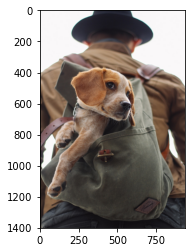

In [3]:
img = cv2.imread('../Data/dog_backpack.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

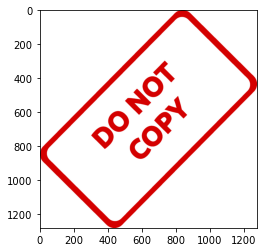

In [4]:
img2 = cv2.imread('../Data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [5]:
print(img.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)


In [6]:
img = cv2.resize(img,(1200,1200))
print(img.shape)

img2 = cv2.resize(img2,(1200,1200))
print(img2.shape)

(1200, 1200, 3)
(1200, 1200, 3)


# Blending Images of the same size

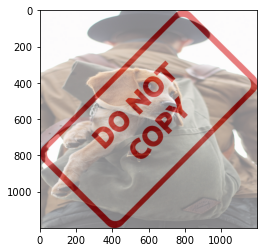

In [7]:
# cv2.addWeighted() takes src1, alpha, src2, beta, gamma 
ImgBlend = cv2.addWeighted(img,0.5,img2,0.5,0.1)
plt.imshow(ImgBlend)

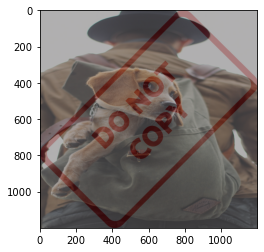

In [8]:
# lest try with different alpha , beta and gamma values
ImgBlend = cv2.addWeighted(img,0.5,img2,0.2,0.3)
plt.imshow(ImgBlend)

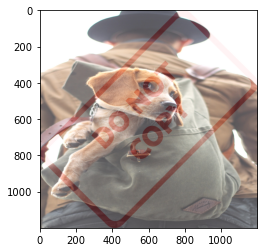

In [9]:
ImgBlend = cv2.addWeighted(img,0.9,img2,0.2,20)
plt.imshow(ImgBlend)

# Blending Images of the different sizes
* There are two methods of dealing with different sized images
* **1)** Overlay small image on the top of a larger image (no blending), using numpy re-assignment
* **2)** Blending togather images of different sizes

### Using First Method

In [10]:
img = cv2.imread('../Data/dog_backpack.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [11]:
img.shape , img2.shape

((1401, 934, 3), (1280, 1277, 3))

In [12]:
# now the smaller image between two images is img2 lets make it more smaller
small_img = cv2.resize(img2,(600,600))
print(small_img.shape)
large_img = img
print(large_img.shape)

(600, 600, 3)
(1401, 934, 3)


(1401, 934, 3)


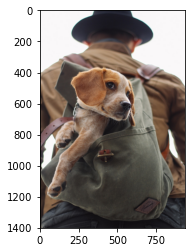

In [13]:
print(large_img.shape)
plt.imshow(large_img)

(600, 600, 3)


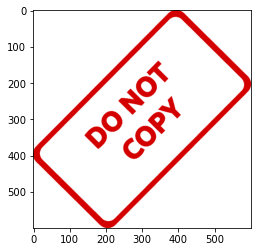

In [14]:
print(small_img.shape)
plt.imshow(small_img)

In [16]:
# first we need to set from which point we will paste our smaller image to the larger image
x_offset = 0
y_offset = 0 

In [17]:
x_end = x_offset + small_img.shape[1] # shape[1] representing columns because columns decide the width of an image
y_end = y_offset + small_img.shape[0] # shape[0] representing rows because rows decides the height of an image
# adding x and y offset will help managing smaller image to large image
# in this case the x and y end will be 0 + 600 = 600 so the image will be pasted at (600,600)
# but what if the offset points will be different ,
# x_offset,y_offset = 200,200
# x_end = x_offset + small_img.shape[1]
# y_end = y_offset + small_img.shape[0]
#            200   +      600   = 800   
# in this case the image will now be pasted at (800,800)

# If we dont add x and y offset we will get error because of image size

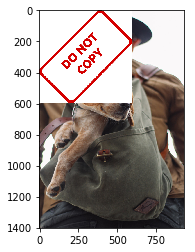

In [19]:
# here we have set y_offset first because we know that we do slice in this format [row:row,column:column]  
# so here y_offset and y_end are representing rows , x_offset and x_end are representing rows 
large_img[y_offset:y_end,x_offset:x_end] = small_img
# this code means paste my small image on the area which we have specified using slicing
plt.imshow(large_img)